In [1]:
!pip install datasets

  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached multiprocess-0.70.16-py310-none-any.whl.metadata (7.2 kB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
Using cached dill-0.3.8-py3-none-any.whl (116 kB)
Using cached multiprocess-0.70.16-py310-none-any.whl (134 kB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2022.8.2
    Uninstalling fsspec-2022.8.2:
      Successfully uninstalled fsspec-2022.8.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.8.1 requires numpy<1.25.0,>=1.17.3, but you have numpy 1.26.4 which is incompatible.
spacy 3.5.2 requires pydantic!=1.8,!=1.8.1,<1.11.0,>=1.7.4, but you have pydantic 2.11.1 which is incompatible.
thinc 8.1.9 requires pydantic!=1.8,!=1.8.1,<1.11.0,>=1.7.4, but you have pydantic 2.11.1 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
from datasets import load_dataset

import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split

import shutil

C:\Users\docto\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\docto\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [1]:
HF_CACHE_DIR = 'D:/hf_cache'
dataset_name = "flickr30k"

#os.environ['HF_HOME'] = HF_CACHE_DIR
#os.environ['HF_DATASETS_CACHE'] = os.path.join(HF_CACHE_DIR, "datasets")
#os.environ['HF_HUG_CACHE'] = os.path.join(HF_CACHE_DIR, "hub")

In [4]:


dataset = load_dataset("flickr30k", cache_dir = "D:/hf_cache/huggingface/datasets")['test']



Using the latest cached version of the dataset since flickr30k couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'TEST' at D:\hf_cache\huggingface\datasets\flickr30k\TEST\1.1.0\2b239befc81b6e3f035ce6bd52f5f4d60f5625f7 (last modified on Sat May 17 04:26:42 2025).
C:\Users\docto\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
from datasets import get_dataset_config_names

In [6]:
print(dataset.cache_files)

{'test': [{'filename': 'D:\\hf_cache\\huggingface\\datasets\\flickr30k\\TEST\\1.1.0\\2b239befc81b6e3f035ce6bd52f5f4d60f5625f7\\flickr30k-test-00000-of-00009.arrow'}, {'filename': 'D:\\hf_cache\\huggingface\\datasets\\flickr30k\\TEST\\1.1.0\\2b239befc81b6e3f035ce6bd52f5f4d60f5625f7\\flickr30k-test-00001-of-00009.arrow'}, {'filename': 'D:\\hf_cache\\huggingface\\datasets\\flickr30k\\TEST\\1.1.0\\2b239befc81b6e3f035ce6bd52f5f4d60f5625f7\\flickr30k-test-00002-of-00009.arrow'}, {'filename': 'D:\\hf_cache\\huggingface\\datasets\\flickr30k\\TEST\\1.1.0\\2b239befc81b6e3f035ce6bd52f5f4d60f5625f7\\flickr30k-test-00003-of-00009.arrow'}, {'filename': 'D:\\hf_cache\\huggingface\\datasets\\flickr30k\\TEST\\1.1.0\\2b239befc81b6e3f035ce6bd52f5f4d60f5625f7\\flickr30k-test-00004-of-00009.arrow'}, {'filename': 'D:\\hf_cache\\huggingface\\datasets\\flickr30k\\TEST\\1.1.0\\2b239befc81b6e3f035ce6bd52f5f4d60f5625f7\\flickr30k-test-00005-of-00009.arrow'}, {'filename': 'D:\\hf_cache\\huggingface\\datasets\\fli

In [5]:
print(dataset)

Dataset({
    features: ['image', 'caption', 'sentids', 'split', 'img_id', 'filename'],
    num_rows: 31014
})


In [6]:
print(dataset[0].keys())

dict_keys(['image', 'caption', 'sentids', 'split', 'img_id', 'filename'])


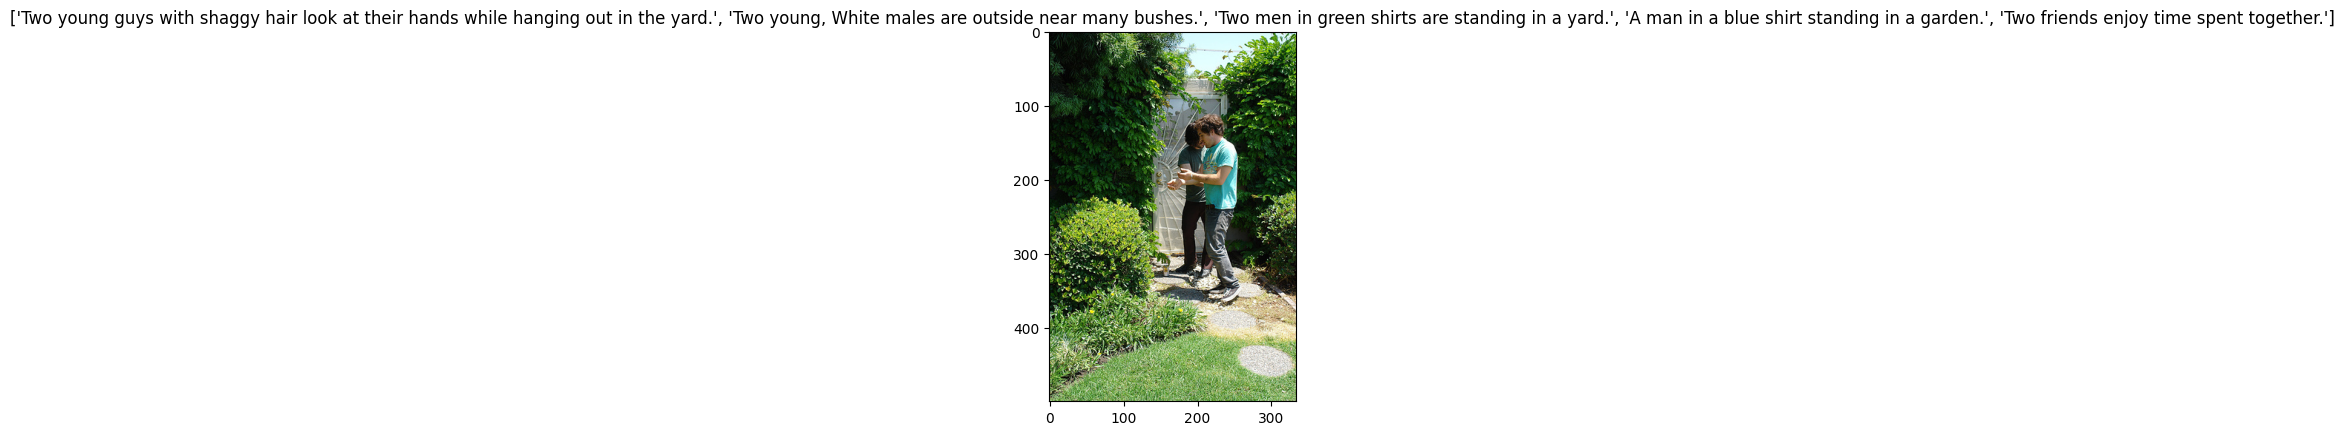

In [9]:
first = dataset[0]
image = first['image']
caption = first['caption']

plt.imshow(image)
plt.title(caption)
plt.show()

In [19]:
print(caption[0])

Two young guys with shaggy hair look at their hands while hanging out in the yard.


In [20]:
#resizing all the images to the same size so that the tensors are all the same dimension

output_dir = "D:/flickr30k_preprocessed"

os.makedirs(output_dir, exist_ok = True)

resize_transform = transforms.Compose([
    transforms.Resize((256,256)),
])

for i, example in enumerate(dataset):
    img = resize_transform(example['image'])
    filename = os.path.join(output_dir, f'img_{i:05d}.jpg')
    img.save(filename)

    with open(os.path.join(output_dir, f'img_{i:05d}.txt'), 'w', encoding = 'utf-8') as f:
        for caption in example['caption']:
            
            f.write(caption.strip() + "\n")

    if i % 1000 == 0:
        print(f'saved {i} images')

print('Done resizing images')

saved 0 images
saved 1000 images
saved 2000 images
saved 3000 images
saved 4000 images
saved 5000 images
saved 6000 images
saved 7000 images
saved 8000 images
saved 9000 images
saved 10000 images
saved 11000 images
saved 12000 images
saved 13000 images
saved 14000 images
saved 15000 images
saved 16000 images
saved 17000 images
saved 18000 images
saved 19000 images
saved 20000 images
saved 21000 images
saved 22000 images
saved 23000 images
saved 24000 images
saved 25000 images
saved 26000 images
saved 27000 images
saved 28000 images
saved 29000 images
saved 30000 images
saved 31000 images
Done resizing images


In [10]:
#foggy image generator

input_dir = "D:/flickr30k_preprocessed"
output_dir = "D:/flickr30k_foggy"

os.makedirs(output_dir, exist_ok = True)

to_tensor = transforms.ToTensor()
to_pil = transforms.ToPILImage()

def add_fog(img_tensor, fog_strength = 0.3):
    fog = torch.empty_like(img_tensor).uniform_(fog_strength, 1)
    foggy_image = img_tensor * (1 - fog_strength) + fog * fog_strength
    return torch.clamp(foggy_image, 0.0, 1.0)

for filename in tqdm(os.listdir(input_dir)):
    if not filename.endswith('.jpg'):
        continue
    img_path = os.path.join(input_dir, filename)
    img = Image.open(img_path).convert('RGB')

    img_tensor = to_tensor(img)
    foggy_tensor = add_fog(img_tensor, fog_strength = 0.6)
    foggy_img = to_pil(foggy_tensor)

    name, ext = os.path.splitext(filename)
    foggy_filename = name + '_foggy' + ext
    foggy_img.save(os.path.join(output_dir, foggy_filename))

    

    #foggy_img.save(os.path.join(output_dir, filename))

100%|███████████████████████████████████████████████████████████████████████████| 62028/62028 [04:01<00:00, 256.69it/s]


In [5]:
#gaussian noise generator - add gaussian noise to foggy images

input_dir = "D:/flickr30k_foggy"
output_dir = "D:/flickr30k_foggy_noisy"

os.makedirs(output_dir, exist_ok = True)

to_tensor = transforms.ToTensor()
to_pil = transforms.ToPILImage()

def add_noise(img_tensor, mean = 0.0, std = 0.05):
    noise = torch.randn_like(img_tensor) * std + mean
    noisy_image = img_tensor + noise
    return torch.clamp(noisy_image, 0.0, 1.0)

for filename in tqdm(os.listdir(input_dir)):
    if not filename.endswith('.jpg'):
        continue
    img_path = os.path.join(input_dir, filename)
    img = Image.open(img_path).convert('RGB')
    img_tensor = to_tensor(img)

    noise_tensor = add_noise(img_tensor)
    noisy_image = to_pil(noise_tensor)
    name, ext = os.path.splitext(filename)
    noisy_filename = name + '_noisy' + ext
    noisy_image.save(os.path.join(output_dir, noisy_filename))


    





100%|████████████████████████████████████████████████████████████████████████████| 31014/31014 [07:18<00:00, 70.68it/s]


In [4]:
#move clear images to its own folder to make the dataloading simpler

source_dir = 'D:/flickr30k_preprocessed'
dest_dir = 'D:/flickr30k_clear'

os.makedirs(dest_dir, exist_ok = True)

for filename in os.listdir(source_dir):
    if filename.endswith('.jpg'):
        src_path = os.path.join(source_dir, filename)
        dest_path = os.path.join(dest_dir, filename)
        shutil.copy2(src_path, dest_path)


In [6]:
clear_dir = 'D:/flickr30k_clear'
foggy_dir = 'D:/flickr30k_foggy'

#each clear image has a paired foggy image such that img001.jpg has a corresponding img001_foggy.jpg

#getting a list of all filenames that have a paired clear and foggy image.
all_filenames = [f for f in os.listdir(clear_dir) if f.endswith('.jpg') and os.path.exists(os.path.join(foggy_dir, f.replace('.jpg', '_foggy.jpg')))]

train_files, test_files = train_test_split(all_filenames, test_size = 0.2, random_state = 100)

#each of the train_files and test_files can be input as 'filenames' in the class below

In [1]:
#########################################################

In [3]:
class FoggyDataSet(Dataset):
    def __init__(self, foggy_dir, clear_dir, filenames, transform = None):
        self.foggy_dir = foggy_dir
        self.clear_dir = clear_dir
        self.transform = transform
        self.filenames = filenames

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        filename = self.filenames[idx]
        

        foggy_path = os.path.join(self.foggy_dir, self.filename.replace('.jpg', '_foggy.jpg'))
        clear_path = os.path.join(self.clear_dir, filename)

        foggy_image = Image.open(foggy_path).convert('RGB')
        clear_image = Image.open(clear_path).convert('RGB')

        if self.transform:
            foggy_image = self.transform(foggy_image)
            clear_image = self.transform(clear_image)

        return foggy_image, clear_image
        
            

In [4]:
clear_dir = 'D:/flickr30k_clear'
foggy_dir = 'D:/flickr30k_foggy'

transform = transforms.Compose([
    transforms.ToTensor(),
])

train_data = FoggyDataSet(foggy_dir, clear_dir, train_files, transform)
test_data = FoggyDataSet(foggy_dir, clear_dir, test_files, transform)

train_loader = DataLoader(train_data, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 32)

In [5]:
import torch.nn as nn
import torch.nn.functional as F

In [6]:
class Unet(nn.Module):
    def __init__(self):
        super().__init__()

        def conv_block(in_channels, out_channels):
            return nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size = 3, padding = 1),
                nn.ReLU(inplace = True),
                nn.Conv2d(in_channels, out_channels, kernel_size = 3, padding = 1),
                nn.ReLU(inplace = True),
            )

        self.enc1 = conv_block(3, 64)
        self.enc2 = conv_block(64, 128)
        self.enc3 = conv_block(128, 256)
        self.enc4 = conv_block(256, 512)

        self.pool = nn.MaxPool2d(2)
        self.bottleneck = conv_block(512, 1024)

        self.up4 = nn.ConvTranspose2d(1024, 512, kernel_size = 2, stride = 2) #skip connections take the 512 output here, add 512 and input 1024 in the next line's conv layer
        self.dec4 = conv_block(1024, 512)

        self.up3 = nn.ConvTranspose2d(512, 256, kernel_size = 2, stride = 2)
        self.dec3 = conv_block(512, 256)

        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size = 2, stride = 2)
        self.dec2 = conv_block(256, 128)

        self.up1 = nn.ConvTranspose2d(128, 64, kernel_size = 2, stride = 2)
        self.dec1 = conv_block(128, 64)

        self.output = nn.Conv2d(64, 3, kernel_size = 1)

    def forward(self, x):
        
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool(e1))
        e3 = self.enc3(self.pool(e2))
        e4 = self.enc4(self.pool(e3))

        b = self.bottleneck(self.pool(e4))

        d4 = self.up4(b)
        d4 = torch.cat([d4, e4], dim = 1)
        d4 = self.dec4(d4)

        d3 = self.up3(d4)
        d3 = torch.cat([d3, e3], dim = 1)
        d3 = self.dec3(d3)

        d2 = self.up2(d3)
        d2 = torch.cat([d2, e2], dim = 1)
        d2 = self.dec2(d2)

        d1 = self.up1(d2)
        d1 = torch.cat([d1, e1], dim = 1)
        d1 = self.dec1(d1)

        out = self.output(d1)

        return out
        
        
            

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = Unet().to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr= 1e-4)

n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    loop = tqdm(train_loader, leave = True)
    for foggy_imgs, clear_imgs in loop:
        foggy_imgs = foggy_imgs.to(device)
        clear_imgs = clear_imgs.to(device)

        outputs = model(foggy_imgs)
        loss = criterion(outputs, clean_imgs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        loop.set_description(f'Epoch [{epoch + 1}/{n_epochs}]')
        loop.set_postfix(loss = loss.item)
     avg_train_loss=train_loss/len(train_loader)

        model.eval()
        val_loss = 0.0
    
    with torch.no_grad():
        for foggy_imgs, clear_imgs in test_loader:
            foggy_imgs = foggy_imgs.to(device)
            claer_imgs = clear_imgs.to(device)

            outputs = model(foggy_imgs)
            loss = criterion(outputs,clear_imgs)
            val_loss += loss.item()
    avg_val_loss = val_loss/len(test_loader)